# Testing A-F plots

In [1]:
import numpy as np
import math
import importlib as imp
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm as tqdmn

import main_1GnB as main

---
---
## Testing `single_run_1GnB()` - time evolution

In [24]:
n = 2

# GEN
p_gen = 0.5
F_new = 0.9
rho_new = np.diag([F_new, (1-F_new)/3, (1-F_new)/3, (1-F_new)/3])

# PURIF
q_purif_vec = np.linspace(0,1,5)
purif_policies = [main.policy_identity, main.policy_replacement, main.policy_DEJMPS]
policy_names = ['Identity', 'Replacement', 'DEJMPS']
pur_after_swap = False

# NOISE
Gamma = 1/50 #1/5

# CONS
p_cons = 0.3

# Numerical
t_end = int(1e6)
randomseed = 2

In [25]:
## SIMULATION ##

imp.reload(main)

Fcons_avg_vec = [[] for policy in purif_policies]
Fcons_stderr_vec = [[] for policy in purif_policies]
A_avg_vec = [[] for policy in purif_policies]
A_stderr_vec = [[] for policy in purif_policies]

for idx_policy, purif_policy in enumerate(purif_policies):
    for q_purif in tqdmn(q_purif_vec):
        F_avg,F_err,A_avg,A_err,_, _, _ = main.single_run_1GnB(n, p_gen, rho_new, q_purif, 
                                                               purif_policy, pur_after_swap, Gamma,
                                                               p_cons, t_end, randomseed)
        Fcons_avg_vec[idx_policy] += [F_avg]
        Fcons_stderr_vec[idx_policy] += [F_err]
        A_avg_vec[idx_policy] += [A_avg]
        A_stderr_vec[idx_policy] += [A_err]
        
sim_data = {'Fcons_avg_vec': Fcons_avg_vec,
            'Fcons_stderr_vec': Fcons_stderr_vec,
            'A_avg_vec': A_avg_vec,
            'A_stderr_vec': A_stderr_vec}

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

In [26]:
## THEORY ##

imp.reload(main)

Fcons_theory_vec = [[] for policy in purif_policies]
A_theory_vec = [[] for policy in purif_policies]

for idx_policy, purif_policy in enumerate(purif_policies):
    for q_purif in q_purif_vec:
        A, Fcons = main.analytical_availability_Fcons(n, p_gen, rho_new, q_purif,
                                                      purif_policy, pur_after_swap, Gamma, p_cons)
        Fcons_theory_vec[idx_policy] += [Fcons]
        A_theory_vec[idx_policy] += [A]

theory_data = {'Fcons_avg': Fcons_theory_vec,
                'A': A_theory_vec}

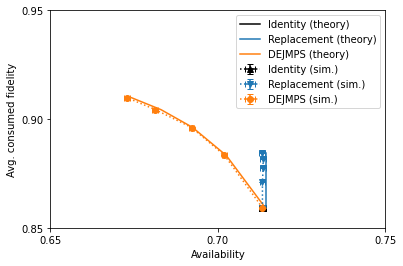

In [27]:
## PLOT ##

imp.reload(main)

main.AFplot(policy_names, sim_data=sim_data, theory_data=theory_data, filename=None)

---
### CONCLUSIONS:
 1. From visual inspection, seems to be working. Not tested quantitatively.
---

---
---
## Testing `single_run_1GnB()` - time evolution

In [29]:
n = 10

# GEN
p_gen = 0.5
F_new = 0.9
rho_new = np.diag([F_new, (1-F_new)/3, (1-F_new)/3, (1-F_new)/3])

# PURIF
q_purif_vec = np.linspace(0,1,10)
purif_policies = [main.policy_DEJMPS, main.policy_doubleDEJMPS, main.policy_nestedDEJMPS]
policy_names = ['DEJMPS', 'Double DEJMPS', 'Nested DEJMPS']
pur_after_swap = False

# NOISE
Gamma = 1/50 #1/5

# CONS
p_cons = 0.3

# Numerical
t_end = int(1e4)
randomseed = 2

In [30]:
## SIMULATION ##

imp.reload(main)

Fcons_avg_vec = [[] for policy in purif_policies]
Fcons_stderr_vec = [[] for policy in purif_policies]
A_avg_vec = [[] for policy in purif_policies]
A_stderr_vec = [[] for policy in purif_policies]

for idx_policy, purif_policy in enumerate(purif_policies):
    for q_purif in tqdmn(q_purif_vec):
        F_avg,F_err,A_avg,A_err,_, _, _ = main.single_run_1GnB(n, p_gen, rho_new, q_purif, 
                                                               purif_policy, pur_after_swap, Gamma,
                                                               p_cons, t_end, randomseed)
        Fcons_avg_vec[idx_policy] += [F_avg]
        Fcons_stderr_vec[idx_policy] += [F_err]
        A_avg_vec[idx_policy] += [A_avg]
        A_stderr_vec[idx_policy] += [A_err]
        
sim_data = {'Fcons_avg_vec': Fcons_avg_vec,
            'Fcons_stderr_vec': Fcons_stderr_vec,
            'A_avg_vec': A_avg_vec,
            'A_stderr_vec': A_stderr_vec}

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

In [31]:
## THEORY ##

imp.reload(main)

Fcons_theory_vec = [[] for policy in purif_policies]
A_theory_vec = [[] for policy in purif_policies]

for idx_policy, purif_policy in enumerate(purif_policies):
    for q_purif in q_purif_vec:
        A, Fcons = main.analytical_availability_Fcons(n, p_gen, rho_new, q_purif,
                                                      purif_policy, pur_after_swap, Gamma, p_cons)
        Fcons_theory_vec[idx_policy] += [Fcons]
        A_theory_vec[idx_policy] += [A]

theory_data = {'Fcons_avg': Fcons_theory_vec,
                'A': A_theory_vec}

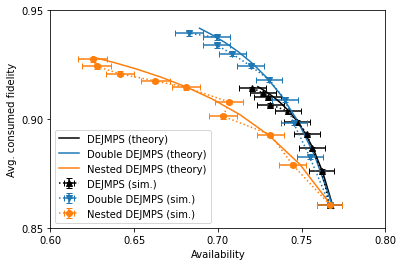

In [34]:
## PLOT ##

imp.reload(main)

main.AFplot(policy_names, sim_data=sim_data, theory_data=theory_data, filename=None)

---
### CONCLUSIONS:
 1. Exciting stuff! Sometimes (n=5 in the Figure) Nested DEJMPS is better than DEJMPS, as one would expect. However, Double DEJMPS (applying DEJMPS at most twice and discarding any extra new links) is even better than Nested DEJMPS. I observed this behavior for n>2 (for n=1 and n=2, Double and Nested are the same).
This suggests that, if we want to apply a simple protocol in a nested way, we should only use a subset of the newly generated links.
 2. In our previous paper, we showed that there is an upper bound to the fidelity that can be achieved by using 2-to-1 bilocal Clifford protocols in a nested way (including DEJMPS). The probability of success of each round of the nested scheme does not go to 1 (since it is only 1 when the output fidelity is 1), and therefore the total probability of success of a nested scheme goes to zero as $n\rightarrow\infty$. This informal argument means that nesting with an increasing number of bad memories $n$ would provide diminishing returns in the avg. consumed fidelity (which should converge to the upper bound as $n\rightarrow\infty$), but it would have a strong impact in the availability, since it would drastically decrease the overall probability of success. This hints that there must be a finite optimal number of purification rounds, i.e., in general we should only use a subset of the newly generated links for nested purification. In the previous examples, this optimal number seems to be 2.
 3. One of the main arguments against nested purification is the time it takes, since purification rounds may need to be performed sequentially. In our setup, we assume purification is instantaneous, and even with that assumption nesting as much as possible is not always a good idea, as discussed in the previous points.
---